# Tutorial 2 - Hairpin trajectories 

This is a follow-up to Tutorial 1.  Here, rather than manually examining secondary structures of interest, we let a simulation run explore the full secondary structure energy landscape according to a Metropolis-biased random walk.

In [1]:
from multistrand.objects import *
from multistrand.options import Options
from multistrand.system import SimSystem, energy

More meaningful names for argument values to the energy() function call, below.

In [2]:
Loop_Energy = 0    # requesting no dG_assoc or dG_volume terms to be added.  So only loop energies remain.
Volume_Energy = 1  # requesting dG_volume but not dG_assoc terms to be added.  No clear interpretation for this.
Complex_Energy = 2 # requesting dG_assoc but not dG_volume terms to be added.  This is the NUPACK complex microstate energy, sans symmetry terms.
Tube_Energy = 3    # requesting both dG_assoc and dG_volume terms to be added.  Summed over complexes, this is the system state energy.

Results of the simulation are stored in the Options object `o` that was used to set up the simulation.  Since this is a "Trajectory Mode" simulation, we will extract the sequence of conformations visited, and print them.  Assumes a single strand is being simulated.

In [3]:
def print_trajectory(o):
    print o.full_trajectory[0][0][3]   # the strand sequence
    print o.start_state[0].structure   # the starting structure
    for i in range(len(o.full_trajectory)):
        time = o.full_trajectory_times[i]
        state = o.full_trajectory[i][0]
        struct = state[4]
        dG = state[5]
        print struct + ' t=%11.9f seconds, dG=%6.2f kcal/mol' % (time, dG)

Sequence is from Schaeffer's PhD thesis, chapter 7, figure 7.1 -- start with no base pairs formed.

In [4]:
c = Complex( strands=[Strand(name="hairpin", sequence="GTTCGGGCAAAAGCCCGAAC")], structure= 20*'.' )

*WARNING!*  Unfortunately, Multistrand currently does not test to check that the requested structure is valid.
Providing an invalid structure is likely to lead to a core dump or segmentation fault.

In [5]:
o = Options(temperature=25, dangles='Some', start_state = [c], 
            simulation_time = 0.0000001,  # 0.1 microseconds
            num_simulations = 1,  # don't play it again, Sam
            output_interval = 1,  # record every single step
            rate_method = 'Metropolis', # the default is 'Kawasaki' (numerically, these are 1 and 2 respectively)
            rate_scaling = 'Calibrated', # this is the same as 'Default'.  'Unitary' gives values 1.0 to both.  
            simulation_mode = 'Trajectory')  # numerically 128.  See interface/_options/constants.py for more info about all this.

In [6]:
print "k_uni = %g /s, k_bi = %g /M/s" % (o.unimolecular_scaling, o.bimolecular_scaling)  # you can also set them to other values if you wantA

k_uni = 4.4e+08 /s, k_bi = 1.26e+06 /M/s


This actually runs the simulation.  

In [7]:
s = SimSystem(o)
s.start()

Count: 10 Time: 8.19643004287e-09
Count: 20 Time: 8.1654369044e-08


*Important caveat*:  `SimSystem` will initialize the energy model according to information in Options `o` if the energy model has not yet been initialized.  But if prior calls have already initialized the energy model -- even if it's at another temperature or join_concentration -- then it will not be automatically re-initialized.  You would have to do this manually.

In [8]:
print_trajectory(o)

GTTCGGGCAAAAGCCCGAAC
....................
.....(........)..... t=0.000000002 seconds, dG=  1.81 kcal/mol
....((........)).... t=0.000000002 seconds, dG=  0.21 kcal/mol
....(((......))).... t=0.000000003 seconds, dG= -2.16 kcal/mol
..(.(((......))).).. t=0.000000003 seconds, dG= -0.69 kcal/mol
..(.((((....)))).).. t=0.000000004 seconds, dG= -2.48 kcal/mol
.((.((((....)))).)). t=0.000000006 seconds, dG= -2.76 kcal/mol
.((..(((....)))..)). t=0.000000007 seconds, dG= -0.54 kcal/mol
..(..(((....)))..).. t=0.000000007 seconds, dG= -0.26 kcal/mol
.((..(((....)))..)). t=0.000000008 seconds, dG= -0.54 kcal/mol
(((..(((....)))..))) t=0.000000008 seconds, dG= -3.13 kcal/mol
(((.((((....)))).))) t=0.000000008 seconds, dG= -5.35 kcal/mol
((((((((....)))))))) t=0.000000011 seconds, dG=-10.37 kcal/mol
(((((((......))))))) t=0.000000047 seconds, dG= -8.58 kcal/mol
((((((((....)))))))) t=0.000000048 seconds, dG=-10.37 kcal/mol
(((((((......))))))) t=0.000000050 seconds, dG= -8.58 kcal/mol
((((((((....)

Note that the simulation proceeds until the time limit has been EXCEEDED.  That means that, at the exact time specified, the system is in the PENULTIMATE state. 

Just FYI -- but this is important if you are sampling to get an "equilibrium" or time-dependent sample.  If you were to take the last state, and if that state is very short-lived, then you would over-sample it.

In [9]:
def myplot():
    import numpy as np
    import matplotlib
    import matplotlib.pylab as plt

    times = o.full_trajectory_times
    states = o.full_trajectory
    energies = [s[0][5] for s in states]  # you can examine 'states' to see what other useful information is there

    plt.figure(1)
    plt.plot(times,energies,'go', times,energies,'g-')
    plt.title("Energy landscape for simulated hairpin folding trajectory")
    plt.xlabel("Time (seconds)",fontsize='larger')
    plt.ylabel("Microstate Energy (kcal/mol)",fontsize='larger')
    plt.yticks(fontsize='larger',va='bottom')
    plt.xticks(fontsize='larger')
    plt.show()

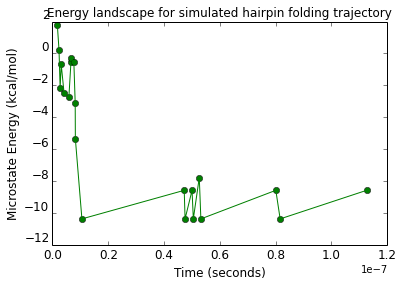

In [10]:
%matplotlib inline
myplot()